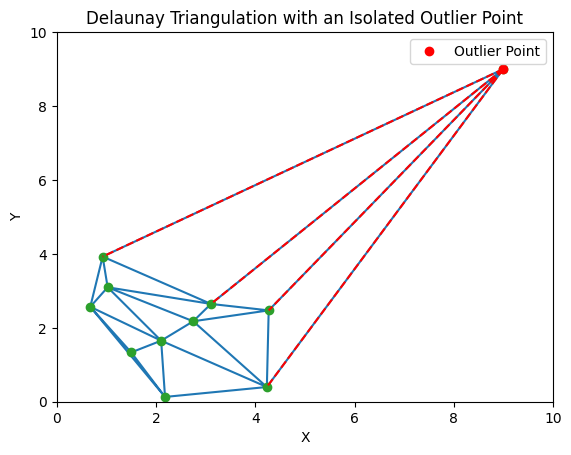

In [24]:
import numpy as np
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt

# Generate random points
np.random.seed(2)
points = np.random.rand(10, 2) * 5  # Random points in a larger range

# Add an isolated outlier point
outlier_point = [9, 9]
points = np.vstack((points, outlier_point))

# Compute Delaunay triangulation
tri = Delaunay(points)

# Find the indices of the outlier point and its neighboring points in the triangulation
outlier_idx = len(points) - 1
outlier_neighbors = tri.vertex_neighbor_vertices[1][tri.vertex_neighbor_vertices[0][outlier_idx]:tri.vertex_neighbor_vertices[0][outlier_idx+1]]

# Plot Delaunay triangulation
plt.triplot(points[:, 0], points[:, 1], tri.simplices)
plt.plot(points[:, 0], points[:, 1], 'o')
plt.plot(outlier_point[0], outlier_point[1], 'ro', label='Outlier Point')
plt.title('Delaunay Triangulation with an Isolated Outlier Point')
plt.xlabel('X')
plt.ylabel('Y')

# Plot edges connecting the outlier point to its neighbors
for neighbor_idx in outlier_neighbors:
    plt.plot([points[outlier_idx, 0], points[neighbor_idx, 0]], [points[outlier_idx, 1], points[neighbor_idx, 1]], 'r--')

# Adjust plot limits for better visibility
plt.xlim(0, 10)
plt.ylim(0, 10)

# Add legend
plt.legend()

# Display the plot
plt.show()


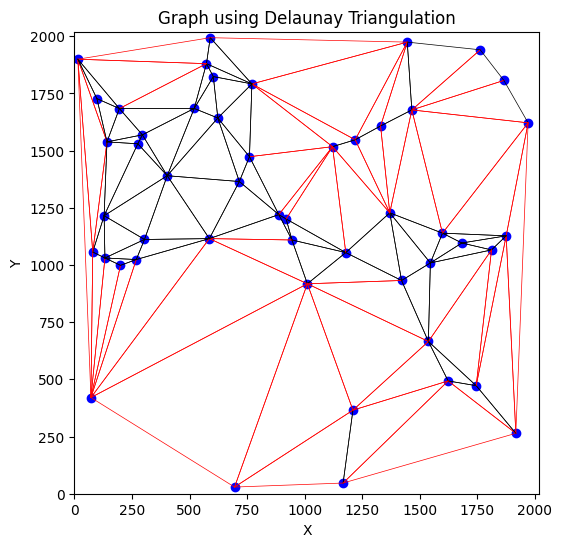

In [8]:
import numpy as np
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt
import itertools as it

# Set random seed for reproducibility
np.random.seed(15)

# Define the number of points and the xlim/ylim ranges
num_points = 50
xlim = (0, 2000)
ylim = (0, 2000)

# Define the likelihoods for each quadrant
quadrant_likelihoods = [0.1, 0.2, 0.3, 0.4]

# Generate random points with different likelihoods for each quadrant
points = []
for _ in range(num_points):
    quadrant = np.random.choice(4, p=quadrant_likelihoods)
    if quadrant == 0:
        x = np.random.uniform(xlim[0], xlim[1] / 2)
        y = np.random.uniform(ylim[0], ylim[1] / 2)
    elif quadrant == 1:
        x = np.random.uniform(xlim[1] / 2, xlim[1])
        y = np.random.uniform(ylim[0], ylim[1] / 2)
    elif quadrant == 2:
        x = np.random.uniform(xlim[0], xlim[1] / 2)
        y = np.random.uniform(ylim[1] / 2, ylim[1])
    else:
        x = np.random.uniform(xlim[1] / 2, xlim[1])
        y = np.random.uniform(ylim[1] / 2, ylim[1])
    points.append([x, y])

points = np.array(points)

# Perform Delaunay triangulation
tri = Delaunay(points)

# Plot the graph + make it transparent
fig = plt.figure(figsize=(6, 6))
fig.patch.set_alpha(0)
plt.scatter(points[:, 0], points[:, 1], color='b', label='Points')

# Plot the edges based on Delaunay triangulation
for simplex in tri.simplices:
    simplex_pairs = it.combinations(simplex, 2)
    for simplex_pair in simplex_pairs:
        if np.sqrt( (points[simplex_pair, 0][0] - points[simplex_pair, 0][1]) ** 2 + (points[simplex_pair, 1][0] - points[simplex_pair, 1][1]) ** 2 ) > 350:
            plt.plot(points[simplex_pair, 0], points[simplex_pair, 1], 'r-', linewidth=0.5)
        else:
            plt.plot(points[simplex_pair, 0], points[simplex_pair, 1], 'k-', linewidth=0.5)

plt.title('Graph using Delaunay Triangulation')
plt.xlabel('X')
plt.ylabel('Y')
# Define the display xlim, ylim
xlim = (0, 2020)
ylim = (0, 2020)
plt.xlim(*xlim)
plt.ylim(*ylim)

# Save the plot
plt.savefig('delaunay_nonunif.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


<Figure size 600x600 with 0 Axes>

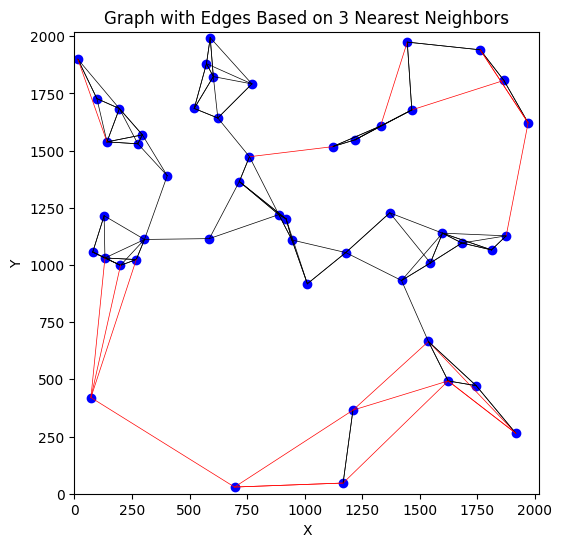

In [4]:
import numpy as np
from scipy.spatial import KDTree
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(15)

# Define the number of points and the xlim/ylim ranges
num_points = 50
xlim = (0, 2000)
ylim = (0, 2000)

# Define the likelihoods for each quadrant
quadrant_likelihoods = [0.1, 0.2, 0.3, 0.4]

# Generate random points with different likelihoods for each quadrant
points = []
for _ in range(num_points):
    quadrant = np.random.choice(4, p=quadrant_likelihoods)
    if quadrant == 0:
        x = np.random.uniform(xlim[0], xlim[1] / 2)
        y = np.random.uniform(ylim[0], ylim[1] / 2)
    elif quadrant == 1:
        x = np.random.uniform(xlim[1] / 2, xlim[1])
        y = np.random.uniform(ylim[0], ylim[1] / 2)
    elif quadrant == 2:
        x = np.random.uniform(xlim[0], xlim[1] / 2)
        y = np.random.uniform(ylim[1] / 2, ylim[1])
    else:
        x = np.random.uniform(xlim[1] / 2, xlim[1])
        y = np.random.uniform(ylim[1] / 2, ylim[1])
    points.append([x, y])

points = np.array(points)

# Build KDTree from the points
kdtree = KDTree(points)

# Find the 3 nearest neighbors for each point
k = 3
distances, indices = kdtree.query(points, k=k+1)  # +1 to exclude the point itself from neighbors

# Create a figure with a transparent background
fig = plt.figure(figsize=(6, 6))
fig.patch.set_alpha(0)

# Plot the graph
fig = plt.figure(figsize=(6, 6))
fig.patch.set_alpha(0)
plt.scatter(points[:, 0], points[:, 1], color='b', label='Points')

# Plot the edges based on nearest neighbors
for i in range(num_points):
    for j in indices[i, 1:]:
        if np.sqrt( (points[i, 0] - points[j, 0]) ** 2 + (points[i, 1] - points[j, 1]) ** 2 ) > 350:
            plt.plot([points[i, 0], points[j, 0]], [points[i, 1], points[j, 1]], 'r-', linewidth=0.5)
        else:
            plt.plot([points[i, 0], points[j, 0]], [points[i, 1], points[j, 1]], 'k-', linewidth=0.5)

plt.title('Graph with Edges Based on 3 Nearest Neighbors')
plt.xlabel('X')
plt.ylabel('Y')
# Define the display xlim, ylim
xlim = (0, 2020)
ylim = (0, 2020)
plt.xlim(*xlim)
plt.ylim(*ylim)

# Save the plot
plt.savefig(f'knn_nonunif.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

AttributeError: 'AxesSubplot' object has no attribute 'set_axis_bgcolor'

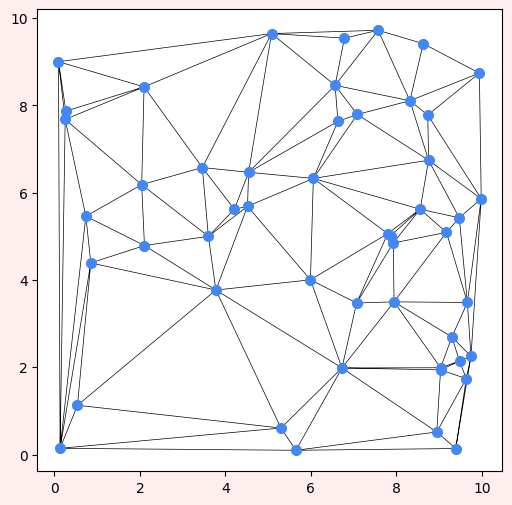

In [59]:
import numpy as np
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(1)

# Define the number of points and the xlim/ylim ranges
num_points = 50
xlim = (0, 10)
ylim = (0, 10)

# Define the likelihoods for each quadrant
quadrant_likelihoods = [0.1, 0.2, 0.3, 0.4]

# Generate random points with different likelihoods for each quadrant
points = []
for _ in range(num_points):
    quadrant = np.random.choice(4, p=quadrant_likelihoods)
    if quadrant == 0:
        x = np.random.uniform(xlim[0], xlim[1] / 2)
        y = np.random.uniform(ylim[0], ylim[1] / 2)
    elif quadrant == 1:
        x = np.random.uniform(xlim[1] / 2, xlim[1])
        y = np.random.uniform(ylim[0], ylim[1] / 2)
    elif quadrant == 2:
        x = np.random.uniform(xlim[0], xlim[1] / 2)
        y = np.random.uniform(ylim[1] / 2, ylim[1])
    else:
        x = np.random.uniform(xlim[1] / 2, xlim[1])
        y = np.random.uniform(ylim[1] / 2, ylim[1])
    points.append([x, y])

points = np.array(points)

# Perform Delaunay triangulation
tri = Delaunay(points)

# Create a figure with a pinkish background color
fig = plt.figure(figsize=(6, 6), facecolor='#FFEEEE')

# Plot the graph with custom node style
plt.triplot(points[:, 0], points[:, 1], tri.simplices, color='black', linewidth=0.5)
plt.plot(points[:, 0], points[:, 1], 'o', color='#4287f5', markersize=7)

# Set the axis background color to transparent
ax = plt.gca()
ax.set_axis_bgcolor('none')

plt.title('Graph using Delaunay Triangulation')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(*xlim)
plt.ylim(*ylim)
plt.grid(True)

# Display the plot
plt.show()
